## *Machine Translation Using a Seq2Seq Architecture*



### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Getting the data

In [ ]:
!git clone https://github.com/zaka-ai/machine_learning_certification/

fatal: destination path 'machine_learning_certification' already exists and is not an empty directory.


We read the english sentences in a dataframe named "english", and the french sentences in a dataframe named "french"

In [ ]:
eng_path = "/content/machine_learning_certification/Challenge 7/en.csv"
english = pd.read_csv(eng_path, header=None)
english.head()

,0
0,"new jersey is sometimes quiet during autumn , ..."
1,the united states is usually chilly during jul...
2,"california is usually quiet during march , and..."
3,the united states is sometimes mild during jun...
4,"your least liked fruit is the grape , but my l..."


In [ ]:
fr_path = "/content/machine_learning_certification/Challenge 7/fr.csv"
french = pd.read_csv(fr_path, header=None)
french.head()

,0
0,new jersey est parfois calme pendant l' automn...
1,les états-unis est généralement froid en juill...
2,"california est généralement calme en mars , et..."
3,"les états-unis est parfois légère en juin , et..."
4,"votre moins aimé fruit est le raisin , mais mo..."


**How many sentences does each of the files contain?**

In [ ]:
print(english.info())
print("\n#################################\n")
print(french.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB
None

#################################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB
None


Now let us concatenate the 2 dataframes into one dataframe that we call df where one column has the english senetnces and the other has the french sentences

In [ ]:
df= pd.concat([english, french], axis=1)

In [ ]:
df.head()

,0,0
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."


In [ ]:
df.columns = ['English', 'French']
df.head()

,English,French
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."


In [ ]:
print(f"The English sentence is: {df.iloc[0,0]} \nFrench sentence is: {df.iloc[0,1]}")

The English sentence is: new jersey is sometimes quiet during autumn , and it is snowy in april . 
French sentence is: new jersey est parfois calme pendant l' automne , et il est neigeux en avril .


### Cleaning Data

The data that we have is almost clean as we can see, we just need to remove the punctuations inside of it.

In [ ]:
import re
df['English'] = df['English'].apply(lambda s: ' '.join(re.sub("[.,!?:;-='...@#_]", " ", s).split()))
df['French'] = df['French'].apply(lambda s: ' '.join(re.sub("[.,!?:;-='...@#_]", " ", s).split()))

In [ ]:
df.head()

,English,French
0,new jersey is sometimes quiet during autumn an...,new jersey est parfois calme pendant l automne...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,california is usually quiet during march and i...,california est généralement calme en mars et i...
3,the united states is sometimes mild during jun...,les états-unis est parfois légère en juin et i...
4,your least liked fruit is the grape but my lea...,votre moins aimé fruit est le raisin mais mon ...


In [ ]:
df.loc[0].values

array(['new jersey is sometimes quiet during autumn and it is snowy in april',
       'new jersey est parfois calme pendant l automne et il est neigeux en avril'],
      dtype=object)

### Exploring the Data

In [ ]:
df['Eng_Length'] = df['English'].apply(lambda x: len(x.split()))
df['Fr_Length'] = df['French'].apply(lambda x: len(x.split()))

In [ ]:
df.head()

,English,French,Eng_Length,Fr_Length
0,new jersey is sometimes quiet during autumn an...,new jersey est parfois calme pendant l automne...,13,14
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...,15,13
2,california is usually quiet during march and i...,california est généralement calme en mars et i...,13,13
3,the united states is sometimes mild during jun...,les états-unis est parfois légère en juin et i...,14,13
4,your least liked fruit is the grape but my lea...,votre moins aimé fruit est le raisin mais mon ...,14,14


Visualizing the distribution of the lengths of english sentences and french sentences.

<Axes: xlabel='Eng_Length', ylabel='Count'>

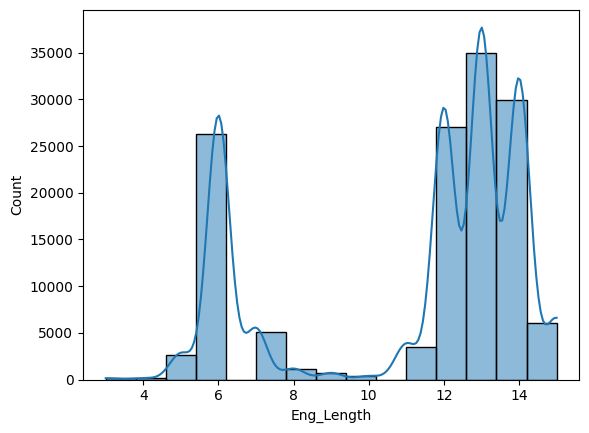

In [ ]:
sns.histplot(data=df['Eng_Length'], bins=15, kde=True)

<Axes: xlabel='Fr_Length', ylabel='Count'>

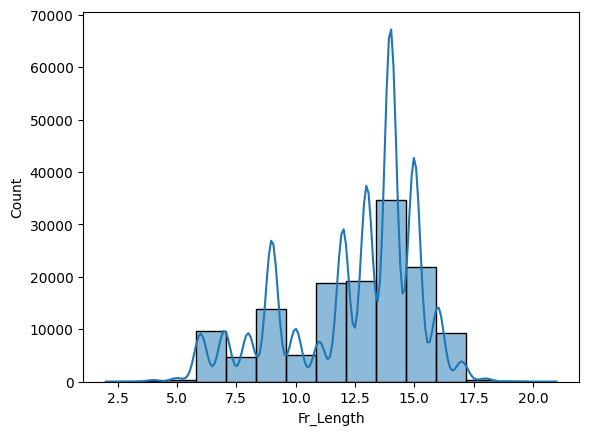

In [ ]:
sns.histplot(data=df['Fr_Length'], bins=15, kde=True)

It seems that the length (in words) distribution of English sentences has a bimodal shape, having peaks at 6 and 13 respectively. That is to say that sentences of lengths around 6 and 13 are most frequent. The same property carries on to French sentences length distribution, but with the first peak being at around 10, with less frequency of sentences at this length, and higher frequency at around 13.

In [ ]:
print(f"Maximum word length of an English sentence: {df['Eng_Length'].max()}")
print(f"Maximum word length of an French sentence: {df['Fr_Length'].max()}")

Maximum word length of an English sentence: 15
Maximum word length of an French sentence: 21


Let's visualize a wordcloud to see what content do we have in our data:

In [ ]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def vis_wordcloud(En_stopwords, Fr_stopwords):
  eng_sentences = " ".join(df['English'].tolist())
  fr_sentences = " ".join(df['French'].tolist())

  eng_wordcloud = WordCloud(width=800, height=800, background_color="white", colormap="inferno", stopwords=En_stopwords).generate(eng_sentences)
  fr_wordcloud = WordCloud(width=800, height=800, background_color="white", colormap="inferno", stopwords=Fr_stopwords).generate(fr_sentences)

   # Display the generated image
  fig, ax = plt.subplots(1, 2, figsize=(16,16))

  ax[0].imshow(eng_wordcloud)
  ax[1].imshow(fr_wordcloud)

  ax[0].axis("off")
  ax[1].axis("off")
  plt.show


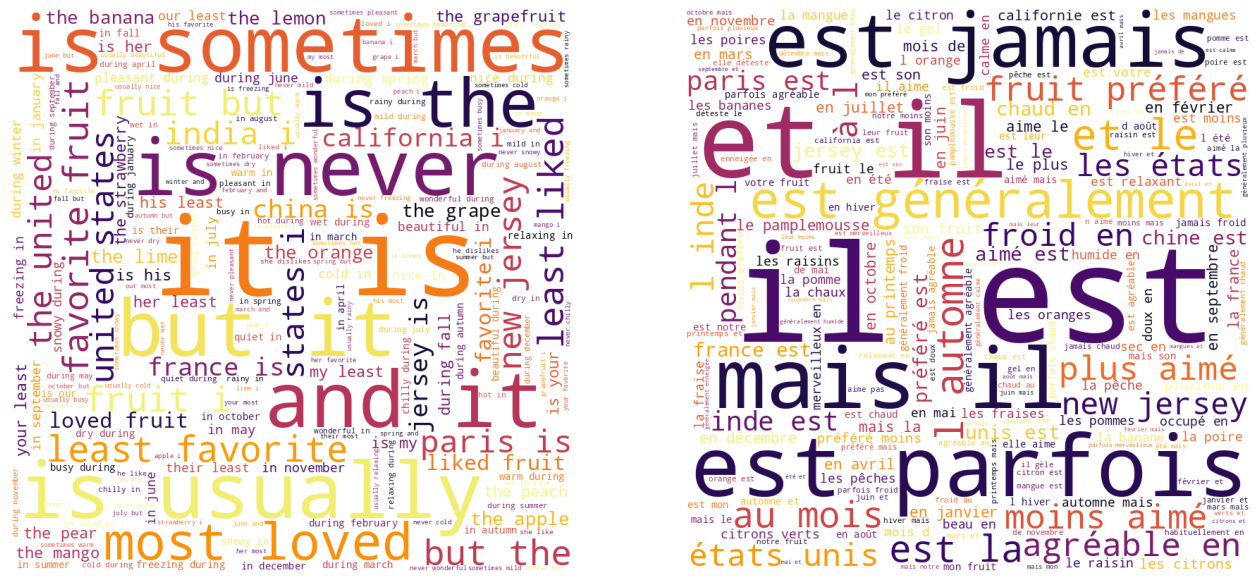

In [ ]:
vis_wordcloud(set(), set())

### Preprocessing the Data

Tokenization

In [ ]:
from keras.preprocessing.text import Tokenizer

eng_tokenizer = Tokenizer()
eng_tokenizer.fit_on_texts(df['English'])

fr_tonkenizer = Tokenizer()
fr_tonkenizer.fit_on_texts(df['French'])

In [ ]:
eng_tokenized = eng_tokenizer.texts_to_sequences(df['English'])
fr_tokenized = fr_tonkenizer.texts_to_sequences(df['French'])

How many unique words do we have in english and in french?



In [ ]:
eng_vacab_size = len(eng_tokenizer.word_index)
fr_vacab_size = len(fr_tonkenizer.word_index)

print('we have {} English words and {} French words'.format(eng_vacab_size, fr_vacab_size))

we have 200 English words and 330 French words


In [ ]:
from keras.utils import pad_sequences

eng_tokenized_padded = pad_sequences(eng_tokenized, maxlen=15, padding='post')
fr_tokenized_padded = pad_sequences(fr_tokenized, maxlen=21, padding='post')

### Modeling

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, GRU, RepeatVector, TimeDistributed, Dense, Bidirectional

model = Sequential()

model.add(Embedding(eng_vacab_size+1, 100, input_length=15))
model.add(GRU(20))
model.add(RepeatVector(21))
model.add(GRU(20, return_sequences=True))
model.add(TimeDistributed(Dense(fr_vacab_size+1, activation='softmax')))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 15, 100)           20100     
                                                                 
 gru_4 (GRU)                 (None, 20)                7320      
                                                                 
 repeat_vector_2 (RepeatVect  (None, 21, 20)           0         
 or)                                                             
                                                                 
 gru_5 (GRU)                 (None, 21, 20)            2520      
                                                                 
 time_distributed_2 (TimeDis  (None, 21, 331)          6951      
 tributed)                                                       
                                                                 
Total params: 36,891
Trainable params: 36,891
Non-trai

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x= eng_tokenized_padded, y=fr_tokenized_padded, validation_split=0.2, batch_size=64, epochs=15)

Epoch 1/15
1724/1724 [==============================] - 66s 36ms/step - loss: 2.7120 - accuracy: 0.4575 - val_loss: 2.1297 - val_accuracy: 0.5154
Epoch 2/15
1724/1724 [==============================] - 58s 33ms/step - loss: 1.9001 - accuracy: 0.5329 - val_loss: 1.7306 - val_accuracy: 0.5566
Epoch 3/15
1724/1724 [==============================] - 67s 39ms/step - loss: 1.6220 - accuracy: 0.5827 - val_loss: 1.5244 - val_accuracy: 0.5989
Epoch 4/15
1724/1724 [==============================] - 62s 36ms/step - loss: 1.4459 - accuracy: 0.6098 - val_loss: 1.3713 - val_accuracy: 0.6210
Epoch 5/15
1724/1724 [==============================] - 58s 34ms/step - loss: 1.3163 - accuracy: 0.6328 - val_loss: 1.2630 - val_accuracy: 0.6425
Epoch 6/15
1724/1724 [==============================] - 58s 34ms/step - loss: 1.2240 - accuracy: 0.6527 - val_loss: 1.1912 - val_accuracy: 0.6581
Epoch 7/15
1724/1724 [==============================] - 70s 40ms/step - loss: 1.1534 - accuracy: 0.6676 - val_loss: 1.1240 -

In [ ]:
from keras.utils import np_utils
fr_tokenized_padded_encoded = np_utils.to_categorical(fr_tokenized_padded)

In [ ]:
model_new = Sequential()

model_new.add(Embedding(eng_vacab_size+1, 100, input_length=15))
model_new.add(GRU(20))
model_new.add(RepeatVector(21))
model_new.add(GRU(20, return_sequences=True))
model_new.add(TimeDistributed(Dense(fr_vacab_size+1, activation='softmax')))

model_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 15, 100)           20100     
                                                                 
 gru_2 (GRU)                 (None, 20)                7320      
                                                                 
 repeat_vector_1 (RepeatVect  (None, 21, 20)           0         
 or)                                                             
                                                                 
 gru_3 (GRU)                 (None, 21, 20)            2520      
                                                                 
 time_distributed_1 (TimeDis  (None, 21, 331)          6951      
 tributed)                                                       
                                                                 
Total params: 36,891
Trainable params: 36,891
Non-trai

In [ ]:
model_new.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_new.fit(x= eng_tokenized_padded, y=fr_tokenized_padded_encoded, validation_split=0.2, batch_size=64, epochs=15)

Epoch 1/15
1724/1724 [==============================] - 62s 34ms/step - loss: 2.6795 - accuracy: 0.4599 - val_loss: 2.2478 - val_accuracy: 0.5073
Epoch 2/15
1724/1724 [==============================] - 58s 34ms/step - loss: 2.0259 - accuracy: 0.5364 - val_loss: 1.7274 - val_accuracy: 0.5668
Epoch 3/15
1724/1724 [==============================] - 58s 34ms/step - loss: 1.5620 - accuracy: 0.5919 - val_loss: 1.4342 - val_accuracy: 0.6150
Epoch 4/15
1724/1724 [==============================] - 59s 34ms/step - loss: 1.3695 - accuracy: 0.6232 - val_loss: 1.3121 - val_accuracy: 0.6348
Epoch 5/15
1724/1724 [==============================] - 57s 33ms/step - loss: 1.2646 - accuracy: 0.6464 - val_loss: 1.2275 - val_accuracy: 0.6536
Epoch 6/15
1724/1724 [==============================] - 57s 33ms/step - loss: 1.1736 - accuracy: 0.6679 - val_loss: 1.1396 - val_accuracy: 0.6764
Epoch 7/15
1724/1724 [==============================] - 58s 33ms/step - loss: 1.0978 - accuracy: 0.6856 - val_loss: 1.0697 -

In [ ]:
def final_prediction_model(sentence):
  
  y_id_to_word = {value:key for key, value in fr_tonkenizer.word_index.items()}
  y_id_to_word[0] = '<PAD>'

  sentence = eng_tokenizer.texts_to_sequences([sentence])
  sentence = pad_sequences(sentence, maxlen=15, padding='post')

  predections = model_new.predict(sentence)

  print(' '.join(y_id_to_word[np.argmax(x)] for x in predections[0]))

In [ ]:
input = 'she is driving a truck'

final_prediction_model(input)

1/1 [==============================] - 3s 3s/step
il conduit le voiture jaune brillant brillant <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


In [ ]:
model2 = Sequential()

model2.add(Embedding(eng_vacab_size+1, 100, input_length=15))
model2.add(Bidirectional(GRU(20)))
model2.add(RepeatVector(21))
model2.add(Bidirectional(GRU(20, return_sequences=True)))
model2.add(TimeDistributed(Dense(fr_vacab_size+1, activation='softmax')))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 15, 100)           20100     
                                                                 
 bidirectional (Bidirectiona  (None, 40)               14640     
 l)                                                              
                                                                 
 repeat_vector_3 (RepeatVect  (None, 21, 40)           0         
 or)                                                             
                                                                 
 bidirectional_1 (Bidirectio  (None, 21, 40)           7440      
 nal)                                                            
                                                                 
 time_distributed_3 (TimeDis  (None, 21, 331)          13571     
 tributed)                                            

In [ ]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model2.fit(x= eng_tokenized_padded, y=fr_tokenized_padded, validation_split=0.2, batch_size=64, epochs=15)

Epoch 1/15
1724/1724 [==============================] - 103s 54ms/step - loss: 2.4073 - val_loss: 1.8671
Epoch 2/15
1724/1724 [==============================] - 83s 48ms/step - loss: 1.6467 - val_loss: 1.4728
Epoch 3/15
1724/1724 [==============================] - 79s 46ms/step - loss: 1.3307 - val_loss: 1.2271
Epoch 4/15
1724/1724 [==============================] - 80s 47ms/step - loss: 1.1411 - val_loss: 1.0837
Epoch 5/15
1724/1724 [==============================] - 79s 46ms/step - loss: 1.0259 - val_loss: 0.9746
Epoch 6/15
1724/1724 [==============================] - 79s 46ms/step - loss: 0.9295 - val_loss: 0.8939
Epoch 7/15
1724/1724 [==============================] - 84s 49ms/step - loss: 0.8535 - val_loss: 0.8195
Epoch 8/15
1724/1724 [==============================] - 79s 46ms/step - loss: 0.7975 - val_loss: 0.7727
Epoch 9/15
1724/1724 [==============================] - 79s 46ms/step - loss: 0.7446 - val_loss: 0.7209
Epoch 10/15
1724/1724 [==============================] - 81s 47

In [ ]:
def final_prediction_model(sentence):
  
  y_id_to_word = {value:key for key, value in fr_tonkenizer.word_index.items()}
  y_id_to_word[0] = '<PAD>'

  sentence = eng_tokenizer.texts_to_sequences([sentence])
  sentence = pad_sequences(sentence, maxlen=15, padding='post')

  predections = model2.predict(sentence)

  print(' '.join(y_id_to_word[np.argmax(x)] for x in predections[0]))

In [ ]:
input = 'you are a good man'

final_prediction_model(input)

1/1 [==============================] - 0s 20ms/step
vous aimez les les <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


In [ ]:
# save the model

model2.save("model.h5")

In [ ]:
import pickle

In [ ]:
# Serialize the object using pickle
serialized_obj = pickle.dumps(eng_tokenizer)
serialized_obj = pickle.dumps(fr_tonkenizer)


# Save the serialized object to a file
with open('eng_tokenizer.pickle', 'wb') as f:
  f.write(serialized_obj)

with open('fr_tonkenizer.pickle', 'wb') as f:
  f.write(serialized_obj)